### Import modules

In [ ]:
import datacube 
from datacube.virtual import catalog_from_file
dc = datacube.Datacube()
from datacube.helpers import write_geotiff
import numpy as np
import sys

sys.path.append("../Scripts")
from dea_plotting import rgb
from dea_bandindices import calculate_indices
from dea_plotting import display_map

### Locations

Use LCCS areas

In [2]:
# # Adelaide:
# min_x= 550000
# max_x= 650000
# min_y= -3850000
# max_y= -3750000

# area_name: "LakeGairdner"
# min_x = 350000
# max_x = 400000
# min_y = -3500000
# max_y = -3450000

# area_name = "Lake_Eyre"
# min_x= 500000
# max_x= 600000
# min_y= -3000000
# max_y= -2900000

# # Diamantina:
# min_x= 800000
# max_x= 900000
# min_y= -2800000
# max_y= -2700000

# area_name = 'Gwydir'
# min_x= 1600000
# max_x= 1700000
# min_y= -3400000
# max_y= -3300000

# area_name = 'Leichhardt'
# min_x= 800000
# max_x= 900000
# min_y= -2000000
# max_y= -1900000

#area_name = 'Murray Valley - original'    
#min_x= 1100000
#max_x= 1200000
#min_y= -4000000
#max_y= -3900000

#area_name = 'Murray Valley'    
#min_x= 1000000
#max_x= 1200000
#min_y= -4100000
#max_y= -3900000

#area_name = 'Kakadu'
#min_x= 0
#max_x= 100000
#min_y= -1350000
#max_y= -1250000

#x = (min_x,max_x)
#y = (min_y,max_y)
#crs = "EPSG:3577"


Or use your own area defined by coordinates

In [2]:
tile = '11_-40'
# Define funciton to get tile bounds
def get_tile_bounds(tile):
    x, y = tile.split('_')
    minx = int(x) * 100000
    miny = int(y) * 100000
    maxx = minx + 100000
    maxy = miny + 100000
    return {'minx': minx, 'miny': miny, 'maxx': maxx, 'maxy': maxy}
bounds = get_tile_bounds(tile)
x=(bounds['minx'],bounds['maxx'])
y=(bounds['miny'],bounds['maxy'])
crs = "EPSG:3577"
output_crs = "EPSG:3577"

print(x,y)

(1100000, 1200000) (-4000000, -3900000)


In [4]:
#area_name = 'Murray Valley'

# Set the central latitude and longitude
#central_lat = -35.7542
#central_lon = 144.3810

# Set the buffer to load around the central coordinates
#buffer = 0.2

# Compute the bounding box for the study area
#study_area_lat = (central_lat - buffer, central_lat + buffer)
#study_area_lon = (central_lon - buffer, central_lon + buffer)

#x = study_area_lon
#y = study_area_lat
#crs = "EPSG:4326"

#display_map(x=study_area_lon, y=study_area_lat, margin=-0.2)

### Set parameters

In [23]:
res = (-25, 25)
time = ("2016-01-01", "2016-12-31")
measurements = ["blue", "green", "red", "nir", "swir1", "swir2"]

query =({'time': time,
             'x':x,
            'y':y,
            'crs':crs,
            'resolution':res,
            'measurements':measurements})

product = ['ls8_nbart_geomedian_annual']

### Load data

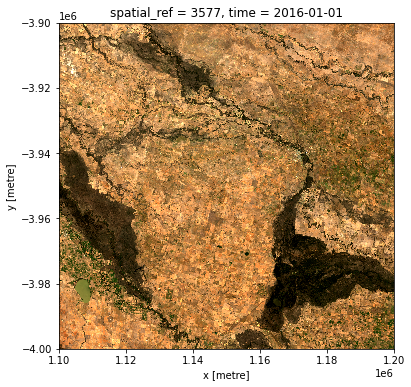

In [24]:
gm = dc.load(product=product, **query)
gm

rgb(gm,bands=['red','green','blue'])

### Calculate TCW

In [25]:
#Do tassled Cap transformation
tcw = calculate_indices(ds=gm, index='TCW', collection='ga_ls_3')

tcw

<xarray.Dataset>
Dimensions:      (time: 1, x: 4000, y: 4000)
Coordinates:
  * time         (time) datetime64[ns] 2016-01-01
  * y            (y) float64 -3.9e+06 -3.9e+06 -3.9e+06 ... -4e+06 -4e+06 -4e+06
  * x            (x) float64 1.1e+06 1.1e+06 1.1e+06 ... 1.2e+06 1.2e+06 1.2e+06
    spatial_ref  int32 3577
Data variables:
    blue         (time, y, x) int16 720 748 773 788 770 ... 397 381 366 376 369
    green        (time, y, x) int16 996 1029 1056 1074 1058 ... 703 712 735 725
    red          (time, y, x) int16 1250 1293 1327 1347 1328 ... 661 652 660 638
    nir          (time, y, x) int16 2197 2191 2185 2229 ... 3285 3273 3352 3500
    swir1        (time, y, x) int16 2478 2538 2583 2599 ... 2123 2021 2027 1991
    swir2        (time, y, x) int16 1815 1891 1943 1936 ... 1193 1150 1148 1105
    TCW          (time, y, x) float64 -0.1833 -0.1901 ... -0.1181 -0.1116
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

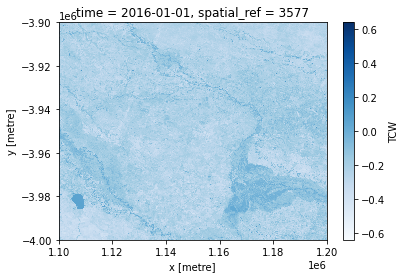

In [26]:
(tcw.TCW.squeeze()).plot.imshow(cmap='Blues')

In [27]:
from datacube.utils import cog
cog.write_cog(tcw.TCW.squeeze(), 'outputs/tcw_2016.tif')

PosixPath('outputs/tcw_2016.tif')

In [28]:
pwd

'/home/jovyan/australia_ecosystems_notebooks'